# **Regression Models with Random Forest and hyperparameter tuning**

**Import libraries**

In [ ]:
import plotly

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

**Load the data set**

In [ ]:
df = pd.read_csv('/content/alk_06_bioactivity_data_3class_pIC50_pubchem_fp (1).csv')

**Input features**

The ***ALK*** data set contains 881 input features and 1 output variable (pIC50 values).

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1956,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1957,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1958,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Output features**

In [ ]:
Y = df.pIC50
Y

0       6.397940
1       4.397940
2       4.571865
3       4.692504
4       4.838632
          ...   
1955    8.552842
1956    5.000000
1957    6.000000
1958    6.000000
1959    6.000000
Name: pIC50, Length: 1960, dtype: float64

**Data dimension**

In [ ]:
X.shape

(1960, 881)

In [ ]:
Y.shape

(1960,)

**Removing low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1960, 176)

In [ ]:
Y.shape

(1960,)

**Data split into training and testing (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((1568, 176), (1568,))

In [ ]:
X_test.shape, Y_test.shape

((392, 176), (392,))

## **Building a Regression Model using Random Forest and comparing with LGBM and MLP Regressor**


In [ ]:
np.random.seed(100)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('R2 Score :',r2_score(Y_test, Y_pred))
print('RMSE :',mean_squared_error(Y_test, Y_pred, squared=False))

R2 Score : 0.6411416264227325
RMSE : 0.8373847362775652


In [ ]:
from lightgbm import LGBMRegressor
model_0 = LGBMRegressor(n_estimators=200)
model_0.fit(X_train, Y_train)
Y_pred_0 = model_0.predict(X_test)
print('R2 Score :',r2_score(Y_test, Y_pred_0))
print('RMSE :',mean_squared_error(Y_test, Y_pred_0, squared=False))

R2 Score : 0.6511501647663243
RMSE : 0.8256248560284825


In [ ]:
from sklearn.neural_network import MLPRegressor
model_1 = MLPRegressor(max_iter=1000)
model_1.fit(X_train, Y_train)
Y_pred_1 = model_1.predict(X_test)
print('R2 Score :',r2_score(Y_test, Y_pred_1))
print('RMSE :',mean_squared_error(Y_test, Y_pred_1, squared=False))

R2 Score : 0.6171855751011667
RMSE : 0.8648835664359507


In [ ]:
Y_test, Y_pred

(1096    9.769551
 572     5.000000
 450     6.587707
 383     7.187087
 1489    6.602060
           ...   
 332     5.769551
 1330    6.240332
 567     9.119186
 618     8.236572
 1406    6.000000
 Name: pIC50, Length: 392, dtype: float64,
 array([9.12012351, 6.42803389, 7.54952693, 8.05361967, 6.14225328,
        7.85180645, 8.18968812, 7.7956049 , 7.3597356 , 7.14211114,
        7.46719352, 8.15351274, 8.46906751, 7.42334863, 8.08289069,
        6.9834426 , 7.61647172, 8.08838558, 6.65230952, 7.63217592,
        7.68285552, 4.43843548, 7.40247749, 6.53432129, 7.57817487,
        5.66256688, 7.1275469 , 6.63524275, 6.36202876, 8.28734908,
        6.77453364, 6.07961421, 8.23909242, 8.69648128, 8.1726855 ,
        8.62933586, 6.43998869, 6.99141215, 7.17785123, 5.26219052,
        6.84973171, 8.12982497, 6.86108498, 6.20403545, 6.71877458,
        8.07303432, 5.9623392 , 9.07916831, 7.89976336, 5.99375946,
        6.69733906, 7.83427685, 6.67816901, 6.07784955, 7.99012988,
        8.1

In [ ]:
pd.DataFrame(data={'Actuals': Y_test, 'Predictions': Y_pred}).sort_index()

,Actuals,Predictions
23,9.301030,8.657282
29,5.080922,5.380648
30,5.031517,5.293212
32,4.744727,5.153417
44,4.301030,5.746938
...,...,...
1937,5.337242,5.409336
1946,5.267606,5.756796
1947,5.443697,5.756796
1950,5.408935,5.756796


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

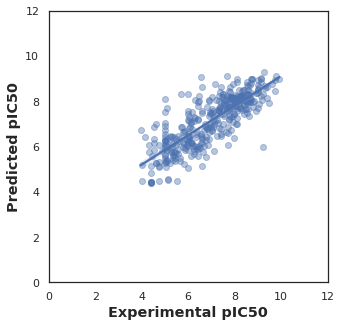

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(10,110,10)
n_estimators_range = np.arange(10,310,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestRegressor()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300])})

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 40, 'n_estimators': 220} with a score of 0.62


# **Dataframe of Grid search parameters and their Accuracy scores**

Exporting the grid search parameters and their resulting accuracy scores into a dataframe

In [ ]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,10,10,0.568542
1,10,20,0.590611
2,10,30,0.595100
3,10,40,0.605461
4,10,50,0.608527


**Preparing data for making contour plots**

Reshaping the data into a compatible format that will be recognized by the contour plot functions prior to plotting

i. Pandas' **groupby()** function to segment the data into groups based on the 2 hyperparameters: **max_features** and **n_estimators**.

In [ ]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
10           10            0.568542
             20            0.590611
             30            0.595100
             40            0.605461
             50            0.608527
...                             ...
100          260           0.609158
             270           0.610000
             280           0.608049
             290           0.610168
             300           0.610583

[300 rows x 1 columns]

**Pivoting the data**

Data is reshaped by pivoting the data into an m by n matrix where rows and columns correspond to the **max_features** and **n_estimators**, respectively.

In [ ]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
10            0.568542  0.590611  0.595100  0.605461  0.608527  0.601725   
20            0.575337  0.596718  0.592307  0.606277  0.607468  0.605608   
30            0.569582  0.601605  0.605868  0.601812  0.608831  0.605606   
40            0.588646  0.598093  0.599477  0.601154  0.608029  0.612213   
50            0.568521  0.600217  0.603259  0.607242  0.609065  0.613795   
60            0.570157  0.604416  0.598413  0.606876  0.604167  0.609061   
70            0.573807  0.593772  0.601300  0.601535  0.603460  0.600999   
80            0.591584  0.597413  0.597845  0.605048  0.605399  0.602701   
90            0.578976  0.591426  0.602774  0.601847  0.605590  0.604639   
100           0.568435  0.584353  0.597082  0.603518  0.599937  0.603366   

                                                      ...                      \
n_estimators       70        80        90        100  ...       210       220   
max_features                                          ...                       
10            0.611228  0.603543  0.605786  0.607876  ...  0.612678  0.610401   
20            0.610581  0.610103  0.607608  0.609175  ...  0.615329  0.612610   
30            0.615402  0.606821  0.608257  0.613222  ...  0.613994  0.614651   
40            0.605353  0.613876  0.610797  0.617185  ...  0.614685  0.618066   
50            0.606533  0.615174  0.608465  0.610541  ...  0.616247  0.614538   
60            0.605672  0.611637  0.611057  0.612047  ...  0.610962  0.609189   
70            0.609280  0.607718  0.609460  0.610745  ...  0.613833  0.610852   
80            0.611387  0.609805  0.611837  0.604035  ...  0.610200  0.610646   
90            0.607445  0.605015  0.607179  0.608379  ...  0.607962  0.608039   
100           0.609050  0.608626  0.605780  0.607381  ...  0.611314  0.610979   

                                                                          \
n_estimators       230       240       250       260       270       280   
max_features                                                               
10            0.610424  0.612500  0.612274  0.611278  0.610830  0.608855   
20            0.614526  0.613742  0.614019  0.613994  0.614527  0.614291   
30            0.613929  0.615576  0.615512  0.614255  0.612774  0.617975   
40            0.616778  0.614777  0.614645  0.614932  0.616057  0.614418   
50            0.615423  0.613534  0.615971  0.612689  0.613211  0.614822   
60            0.612710  0.611217  0.612723  0.613356  0.613918  0.613505   
70            0.614258  0.613009  0.612414  0.613381  0.611873  0.610465   
80            0.615217  0.613031  0.613220  0.610725  0.609810  0.612278   
90            0.608716  0.610029  0.610870  0.608030  0.611114  0.610500   
100           0.607511  0.609777  0.612000  0.609158  0.610000  0.608049   

                                  
n_estimators       290       300  
max_features                      
10            0.610974  0.614187  
20            0.614576  0.615235  
30            0.610907  0.616657  
40            0.617782  0.614620  
50            0.614815  0.614782  
60            0.612672  0.612649  
70            0.611592  0.613788  
80            0.611199  0.612171  
90            0.610520  0.610459  
100           0.610168  0.610583  

[10 rows x 30 columns]

In [ ]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

# **2D Contour Plot**

Visualization of the landscape of the 2 hyperparameters that we are tuning and their influence on the accuracy score.

In [ ]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

# **3D Surface Plot**



In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()